# U.S. Medical Insurance Costs

In [15]:
import csv
import matplotlib.pyplot as plt
import pprint

##### These imports will be used to access our data with our Python program and making graphs to visualize data.

In [16]:
with open("insurance.csv") as insurance_csv:
    insurance_dict = csv.DictReader(insurance_csv)
    # empty lists for each column
    age_list = []
    sex_list = []
    bmi_list = []
    children_list = []
    smoker_list = []
    region_list = []
    charges_list = []
    # moving all of the data into their respective lists
    for row in insurance_dict:
        age_list.append(row['age'])
        sex_list.append(row['sex'])
        bmi_list.append(row['bmi'])
        children_list.append(row['children'])
        smoker_list.append(row['smoker'])
        region_list.append(row['region'])
        charges_list.append(row['charges'])

##### Now that I have separate lists for each category listed at the top of the data file, will test them to make sure they are in order by accessing them by their indexes. Assuming that our lists has the data logged in the correct order, Patient 1 should have an age of 18 and Patient 77 should have a bmi of 35.53.

In [17]:
# testing our lists
print(age_list[1])
print(bmi_list[77])

18
35.53


##### I will be assigning names to each row of data to idenify each patient by a patient number. For example, "Patient 1" would match up with all of the data for the first patient.

In [18]:
# naming each row as a "Patient #"
patient_list = []
for x in range(1, len(age_list)):
    patient_list.append("Patient {}".format(x))

##### Here is all of the data for patient 50.

In [19]:
# Patient 78 info
print(patient_list[50], age_list[50], sex_list[50], bmi_list[50], children_list[50], smoker_list[50], region_list[50], charges_list[50])

Patient 51 18 female 35.625 0 no northeast 2211.13075


##### Here is where I take each datapoint from the lists and start to add them to a insurance record, so that in one list we have all of Patient 78's info! Instead of us having to know which index to reference everytime. The following for loop does just that. It takes all of the patient's info and puts it into one list, then appends that list to a bigger list called "records_list" that will hold all the insurance records. We also change the data points to data types that make the most sense where it makes sense.

In [20]:
# each value in each column as a list
# changing to types that suit best
records_list = []
for i in range(0, len(patient_list)):
    current_patient = []
    current_patient.append(int(age_list[i]))
    current_patient.append(sex_list[i])
    current_patient.append(float(bmi_list[i]))
    current_patient.append(int(children_list[i]))
    current_patient.append(smoker_list[i])
    current_patient.append(region_list[i])
    current_patient.append(float(charges_list[i]))
    records_list.append(current_patient)

##### Now in order to get all of the information we need for any specific patient, all we have to do is call records_list with an index number. for example:

In [21]:
print(records_list[77])

[21, 'male', 35.53, 0, 'no', 'southeast', 1532.4697]


##### Here is where I add keys to the records list in order to make that data more readable.

In [22]:
# going to change records_list to a dictionary with keys
# for easier access into values, created keys based on column names
keys_for_records = [
    "Age", "Sex", "BMI", "Children", "Smoker", "Region", "Charges"
    ]
# using for loop, made a list of dictionaries that used records_list and keys_records
records_as_dict = []
for record in records_list:
    records_as_dict.append(dict(zip(keys_for_records, record)))
# this master dictionary zips together the patient list with generic names and the records_as_dict, as if we did have names so everything is easily accessible.
master_records = dict(zip(patient_list, records_as_dict))
print(master_records["Patient 78"])
print(master_records["Patient 78"]["Region"])

{'Age': 21, 'Sex': 'male', 'BMI': 35.53, 'Children': 0, 'Smoker': 'no', 'Region': 'southeast', 'Charges': 1532.4697}
southeast


# Analyzing Our Data by Region

##### Out of all the directions I wanted to go, I decided to hone in on location. What bearing did location have on what each person's situation was? Were there costs dependent on where they lived to an extent? Did living in a certain area lead you to have more children? Or to smoke? Or to have a higher BMI? I wanted to find out and see if there was anything out of the ordinary about the costs for insurance by region.

##### I have a few variables at my disposal. I figured out I could create a function that calcualted the average by location for some of the variables (age, BMI, children, charges). The only other variable I wanted to also get an average of was smoking, but I'd have to do that separately. The function below would use control flow to add up data and then calculates an average for each region. The output was a rounded (nice to look at) average in a dictionary with a special key.

In [23]:
# function to calculate average BY LOCATION of values that use int or float
# can be used to calculate average of age, BMI, children, charges
# returns a dictionary
def average_by_location(master_records, column_to_inspect):
    sw_total, se_total, nw_total, ne_total = 0, 0, 0, 0
    sw_num, se_num, nw_num, ne_num = 0, 0, 0, 0
    for record in master_records.values():
        if record["Region"] == "southwest":
            sw_total += record[column_to_inspect]
            sw_num += 1
        elif record["Region"] == "southeast":
            se_total += record[column_to_inspect]
            se_num += 1
        elif record["Region"] == "northwest":
            nw_total += record[column_to_inspect]
            nw_num += 1
        elif record["Region"] == "northeast":
            ne_total += record[column_to_inspect]
            ne_num += 1
    sw_average = sw_total / sw_num
    se_average = se_total / se_num
    nw_average = nw_total / nw_num
    ne_average = ne_total / ne_num
    average_dict = {
        "Northeast " + column_to_inspect + " Average": round(ne_average, 2),
        "Southeast " + column_to_inspect + " Average": round(se_average, 2),
        "Southwest " + column_to_inspect + " Average": round(sw_average, 2),
        "Northwest " + column_to_inspect + " Average": round(nw_average, 2)
    }
    return average_dict

In [24]:
# testing the function
# function rounds to two decimal places
reg_avg_charges = average_by_location(master_records, "Charges")
reg_avg_age = average_by_location(master_records, "Age")
reg_avg_bmi = average_by_location(master_records, "BMI")
reg_avg_child = average_by_location(master_records, "Children")
pprint.pprint(reg_avg_charges)
pprint.pprint(reg_avg_age)
pprint.pprint(reg_avg_bmi)
pprint.pprint(reg_avg_child)

{'Northeast Charges Average': 13406.38,
 'Northwest Charges Average': 12365.96,
 'Southeast Charges Average': 14735.41,
 'Southwest Charges Average': 12346.94}
{'Northeast Age Average': 39.27,
 'Northwest Age Average': 39.13,
 'Southeast Age Average': 38.94,
 'Southwest Age Average': 39.46}
{'Northeast BMI Average': 29.17,
 'Northwest BMI Average': 29.2,
 'Southeast BMI Average': 33.36,
 'Southwest BMI Average': 30.6}
{'Northeast Children Average': 1.05,
 'Northwest Children Average': 1.15,
 'Southeast Children Average': 1.05,
 'Southwest Children Average': 1.14}


##### Here is my smoker_probability function. It works similarly to the one above, but becuase of the string nature of the data here, I decided to tackle this differently instead of converting it to 1's and 0's for readability.

In [25]:
def smoker_probability(master_records):
    sw_total, se_total, nw_total, ne_total = 0, 0, 0, 0
    sw_num, se_num, nw_num, ne_num = 0, 0, 0, 0
    for record in master_records.values():
        if record["Region"] == "southwest":
            if record["Smoker"] == "yes":
                sw_total += 1
                sw_num += 1
            else:
                sw_num += 1
        elif record["Region"] == "southeast":
            if record["Smoker"] == "yes":
                se_total += 1
                se_num += 1
            else:
                se_num += 1
        elif record["Region"] == "northwest":
            if record["Smoker"] == "yes":
                nw_total += 1
                nw_num += 1
            else:
                nw_num += 1
        elif record["Region"] == "northeast":
            if record["Smoker"] == "yes":
                ne_total += 1
                ne_num += 1
            else:
                ne_num += 1
    sw_y_smoker_prob = sw_total / sw_num
    se_y_smoker_prob = se_total / se_num
    nw_y_smoker_prob = nw_total / nw_num
    ne_y_smoker_prob = ne_total / ne_num
    average_dict = {
        "Northeast Smoker Probability": round(sw_y_smoker_prob, 2),
        "Southeast Smoker Probability": round(se_y_smoker_prob, 2),
        "Southwest Smoker Probability": round(nw_y_smoker_prob, 2),
        "Northwest Smoker Probability": round(ne_y_smoker_prob, 2)
    }
    return average_dict

In [26]:
# calculating the probability of being a smoker in decimal
smoker_prob = smoker_probability(master_records)
pprint.pprint(smoker_prob)

{'Northeast Smoker Probability': 0.18,
 'Northwest Smoker Probability': 0.21,
 'Southeast Smoker Probability': 0.25,
 'Southwest Smoker Probability': 0.18}


# What does this mean?

##### I've calculated what I wanted to, crunched some numbers, and I've realized a few things. Southeast did seem to pay more overall for insurance. Why? Age was basically the same across the board, so it wasn't that. Children Count was similarly negligible.

##### two variables stuck out. BMI and Smoker Status. In the Southeast, you were more likely to smoke and more likely to have a high BMI. Just on average, Southeasterners had higher BMI's than the rest of the US. Overall, Southeasterners were just more likely to smoke. This had to factor in to their costs for sure. I decided to do a few plots using matplotlib to show the BMI, Smoker Status findings and the resulting insurance costs.

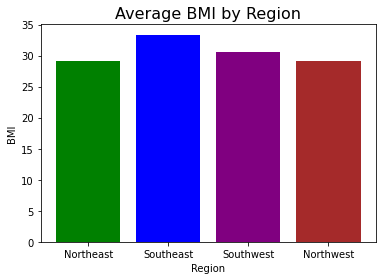

In [27]:
# bar chart to compare BMI levels across regions
diff_colors = ['green','blue','purple','brown']
plt.bar(
    ["Northeast", "Southeast", "Southwest", "Northwest"],
    reg_avg_bmi.values(),
    color=diff_colors
)
plt.title('Average BMI by Region', fontsize = 16)
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()
# Southeast Region leads the way in BMI levels

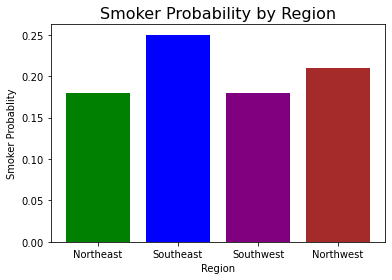

In [28]:
# bar chart to compare Smoking Probability levels across regions
diff_colors = ['green','blue','purple','brown']
plt.bar(
    ["Northeast", "Southeast", "Southwest", "Northwest"],
    smoker_prob.values(),
    color=diff_colors
)
plt.title('Smoker Probability by Region', fontsize = 16)
plt.xlabel('Region')
plt.ylabel('Smoker Probablity')
plt.show()
# Southeast Region leads the way in BMI levels

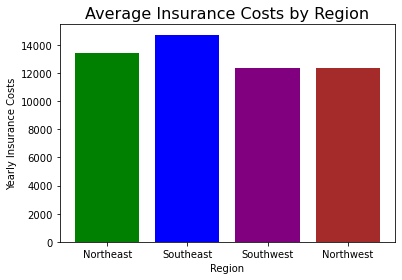

In [29]:
# bar chart to compare insurance costs by region
plt.bar(
    ["Northeast", "Southeast", "Southwest", "Northwest"],
    reg_avg_charges.values(),
    color=diff_colors
)
plt.title('Average Insurance Costs by Region', fontsize = 16)
plt.xlabel('Region')
plt.ylabel('Yearly Insurance Costs')
plt.show()

# My Conclusion

##### Southeat Region yearly insurance costs lead the way, predicatably it's interesting that I have a few variables here that would directly influence insurance costs. Ages, Children, BMI, Smoker Status, etc. I chose to break everything down by region to highlight differences between different parts of the states and where people might pay the most. Ages and Children were basically flat anywhere you lived. So inconsequential. BMI and Smoker status gave a noticable edge to one region (Southeast). Southeast on average has higher BMI's and higher probability of smokers. Predictably, insurance costs were highest in the southeast. It's a chicken/egg conclusion though, with more data to dive into I could come to more conclusions. But are insurance costs high because of the lifestyles in the Southeast? Or are lifestyles the way they are because health insurance costs are so high? What could fix this? It's almost like high insurance costs are a hinderance to "getting healthier." So what will give or what can change to help change lifestyles for the better?